In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

importation du dataset 'ToyotaCorolla.csv

In [2]:
data = pd.read_csv('ToyotaCorolla.csv')
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


visualisation des nuage de point de mes varables dans le data set pour voir si il y a des valeur aberrante visuellement 

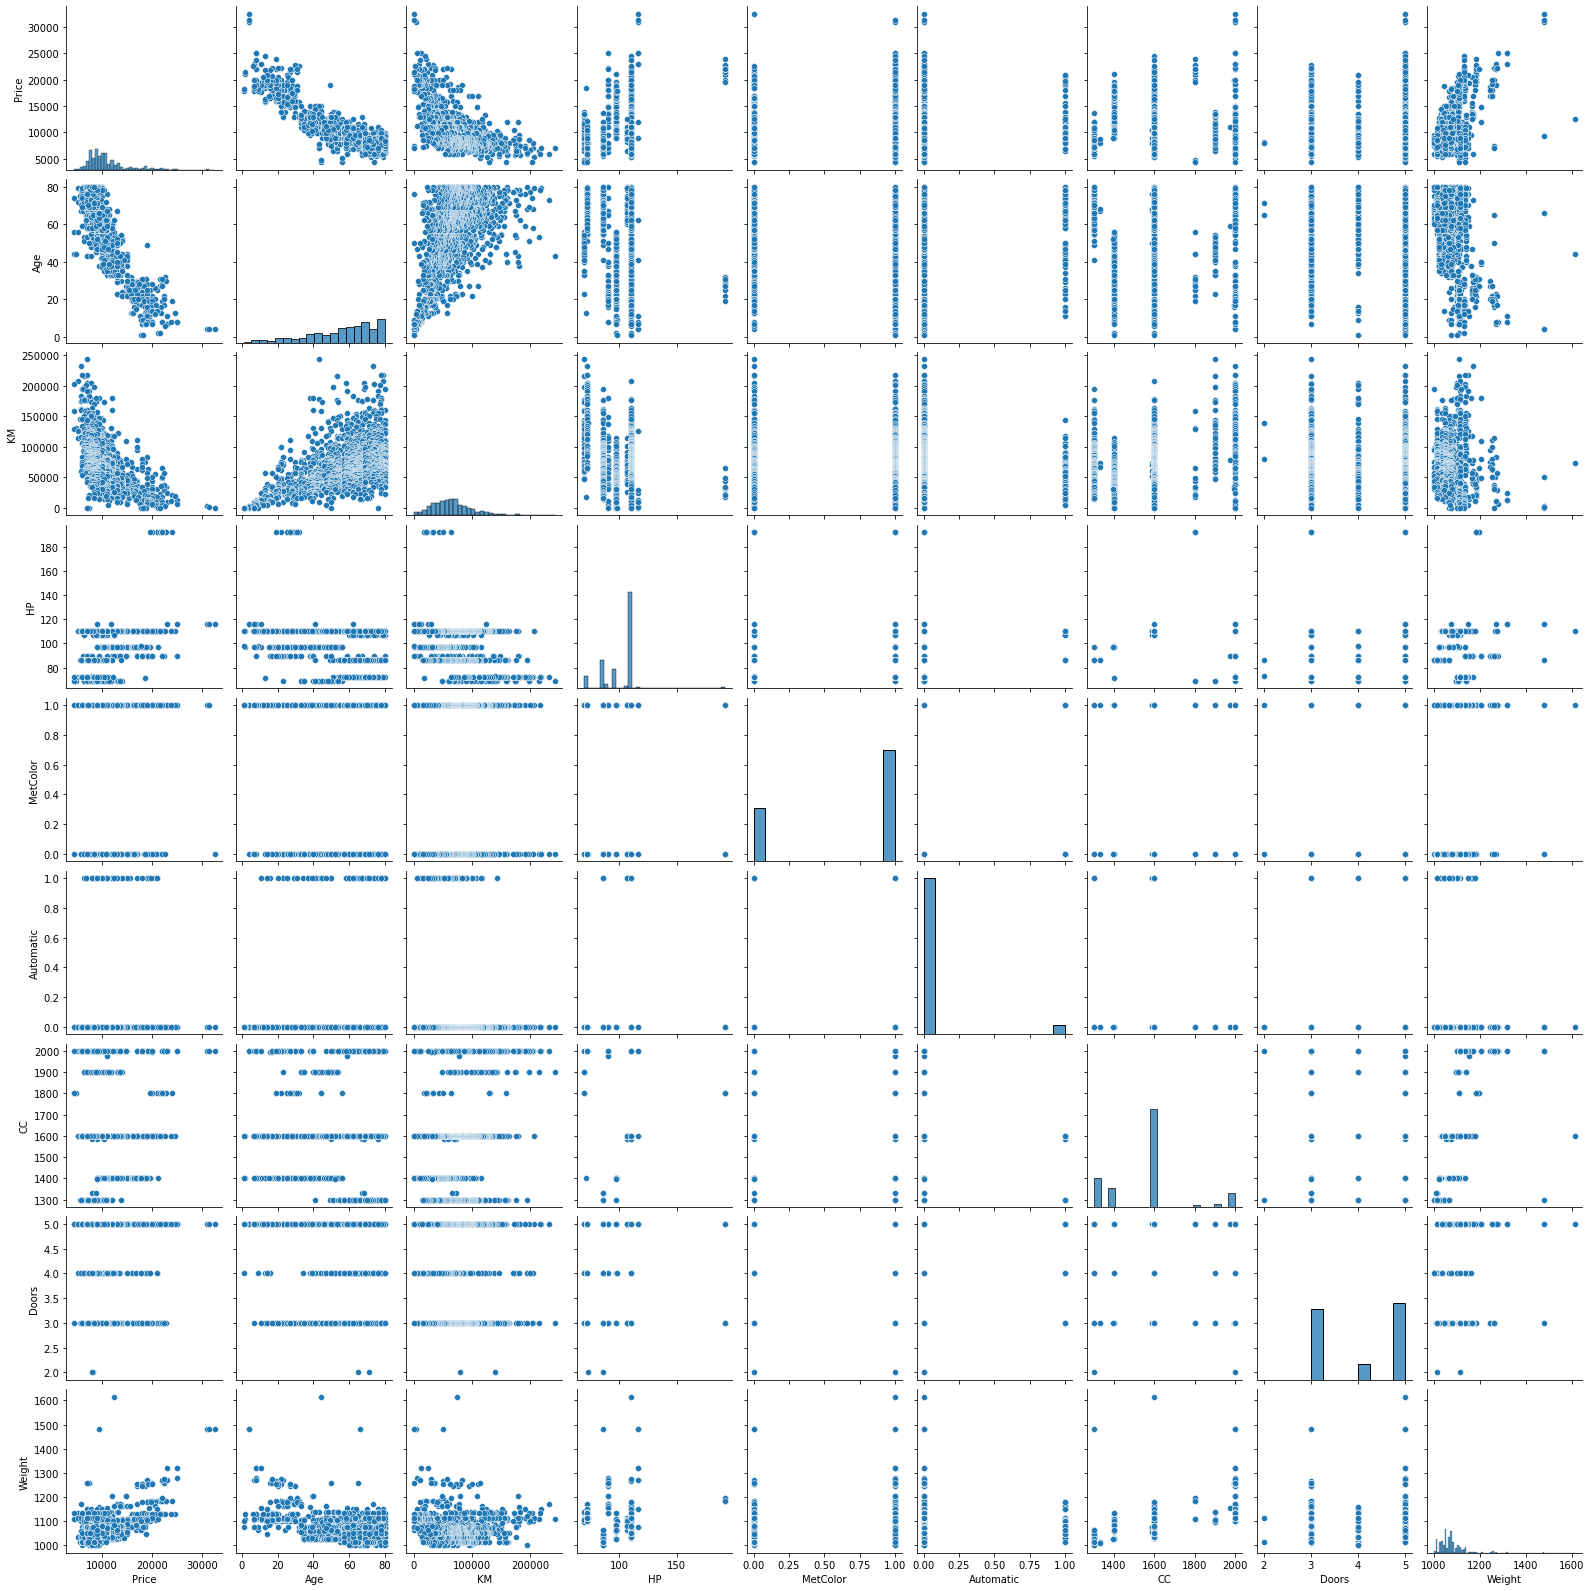

In [12]:
sb.pairplot(data)
plt.show()

# j'affiche la premiere ligne et les statistique descriptive de mon dataset afin d'avoir la moyen et le maximun l'acart type et autre 

In [5]:
data.head() 

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [ ]:
data.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [4]:
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

on a aucune colonne vide

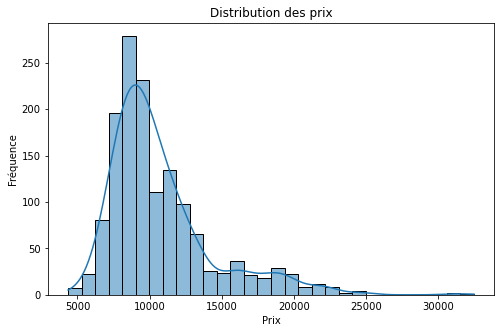

In [13]:
# Distribution des prix
plt.figure(figsize=(8, 5))
sb.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

Il y a un pic autour d'une certaine valeur de prix ( entre 5 000 et 15 000 selon l'histogramme).
Cette concentration signifie que la plupart des véhicules se situent dans cette gamme de prix. cependant il y a certaine voitures relativemnents chers

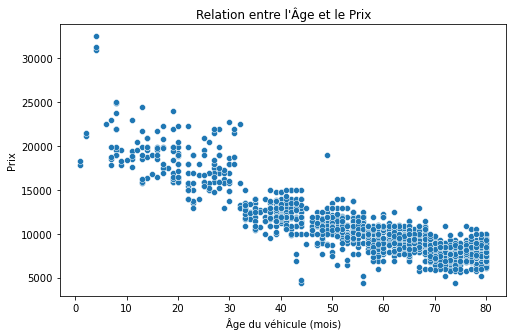

In [14]:
# Relation Prix vs Age
plt.figure(figsize=(8, 5))
sb.scatterplot(x=data['Age'], y=data['Price'])
plt.title("Relation entre l'Âge et le Prix")
plt.xlabel("Âge du véhicule (mois)")
plt.ylabel("Prix")
plt.show()

ici on remarque que plus une voiture prend de l'age(mois) plus sont prix diminue .

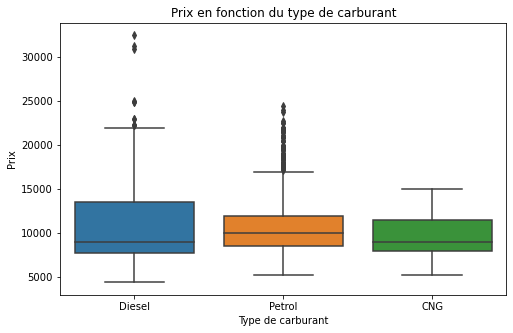

In [15]:
# Comparaison Prix selon le type de carburant
plt.figure(figsize=(8, 5))
sb.boxplot(x=data["FuelType"], y=data["Price"])
plt.title("Prix en fonction du type de carburant")
plt.xlabel("Type de carburant")
plt.ylabel("Prix")
plt.show()

1. **Comparaison des Médianes**  
   - Les médianes sont **différentes** pour chaque type de carburant.  
   - Le Pétrole a une médiane plus élevée que les autres.  

2. **Dispersion des Prix**  
   - Le Diesel a une **dispersion plus grande** (écart interquartile plus large), ce qui signifie qu'il existe une grande variation de prix pour ces véhicules.
   - Le troisième type a une dispersion plus faible, donc les prix sont plus homogènes.

3. **Présence d’Outliers**  
   - De nombreux points **au-dessus des moustaches** indiquent la présence de **véhicules plus chers que la norme**.
   - Ces valeurs aberrantes peuvent être des **véhicules haut de gamme ou récents**.

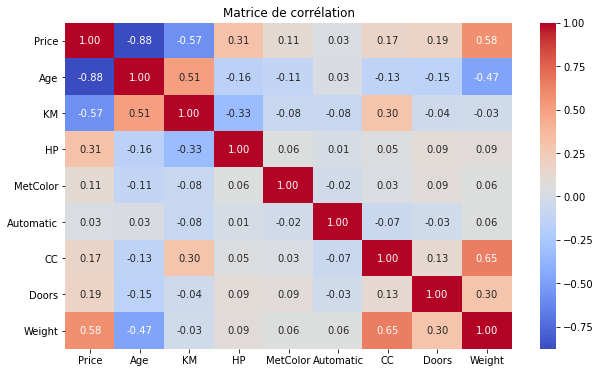

In [16]:
# Matrice de corrélation
plt.figure(figsize=(10, 6))
sb.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Corrélation modérée positive 📈
Entre le cylindre et le poid de la voiture (plus le cylindre est grand plus le vehicule est lourd) = 0.65
Entre kilometrage et age plus age (plus l'age est elevé plus le kilometrage est elevé) = 0.51

# Corrélation forte négative 🔥 
Entre le Prix & l'Age (plus la voiture prend de l'age sont prix diminue) "donc le plus d'une voiture Toyota est influencer par l'age = -0.88

# Corrélation modérée négative ⚖️
Entre le Prix et le kilometrage (kM) (plus ou moins lorque le kilometrage est elevé le prix de la voiture diminue) = -0.57
